In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import csv

import numpy as np
import random
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler


import sys
sys.path.insert(0, "../utils/")
import utils as ut

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError

from keras import backend as K

## Input options

In [3]:
features_names   = ['m1', 'm2', 's1x', 's1y', 's1z', 's2x', 's2y', 's2z', 'theta', 'q', 'Mc'];
regr_data_dir    = '../NewRealistic/'
write_output     = False
out_data_dir     = '../NNtf_results/'
versions         = ['0', '1'] # can be a subset of ['0', '1', '2']
clabels          = ['0'] # can be a subset of ['0', '1'] 

# training options
remove_some_mass = False
epochs           = 200
validation_split = 0.1
batch_size       = 64
verbose_training = 1
hlayers_sizes    = [100, 100];
learning_rate    = 0.0001
scaler_type      = 'mixed'  # standard, minmax, mixed
activation       = 'relu'
out_activation   = 'linear_cut' # sigmoid, linear, linear_cut, linear_cut_T3

## Check on input and dictionary-initialization

In [4]:
# define dictionary for each version considered
Nv       = len(versions)
Nc       = len(clabels)
Nsets    = Nv*Nc

if Nv*Nc!=Nsets:
    print('+++ Wrong input! +++')

datasets = {}
keys     = []
for i in range(0,Nv):
    version = versions[i]
    for j in range(0,Nc):
        clabel = clabels[j]
        key = 'v'+version+'c'+clabel
        keys.append(key)
        datasets[key]         = lambda:0
        datasets[key].clabel  = clabel
        datasets[key].version = version

In [5]:
# define the ouput activation according to the input
if out_activation=="sigmoid":
    def output_activation(x):
        return K.sigmoid(x)*2-1

elif out_activation=="linear":
    def output_activation(x):
        return x

elif out_activation=="linear_cut":
    def output_activation(x):
        signs = K.switch(x>0, 1+x*0, -1+x*0) # x*0 in order to broadcast to correct dimension
        return K.switch(abs(x)<1, x, signs)

elif out_activation=="linear_cut_T3":
    def output_activation(x):
        return 2/(K.exp(-(2*x+2/3*x*x*x))+1)-1

# define model
def buildModelUsingSequential(hlayers_sizes, batch_size, Nfeatures):
    model = Sequential()
    for i in range(0, len(hlayers_sizes)):
        model.add(Dense(hlayers_sizes[i], kernel_initializer='normal', activation=activation))
    model.add(Dense(Nfeatures, kernel_initializer='normal', activation=output_activation))
    model.build((batch_size, Nfeatures))
    return model

mse = MeanSquaredError()

## Loop on versions

********************************************************************************
Key: v0c0
********************************************************************************
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (64, 100)                 1200      
                                                                 
 dense_1 (Dense)             (64, 100)                 10100     
                                                                 
 dense_2 (Dense)             (64, 11)                  1111      
                                                                 
Total params: 12,411
Trainable params: 12,411
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
282/282 [==============================] - 1s 3ms/step - loss: 0.2454 - mean_squared_error: 0.2450 - accuracy: 0.3777 - val_loss: 0.

282/282 [==============================] - 1s 2ms/step - loss: 0.0149 - mean_squared_error: 0.0149 - accuracy: 0.8697 - val_loss: 0.0179 - val_mean_squared_error: 0.0179 - val_accuracy: 0.8840
Epoch 37/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0148 - mean_squared_error: 0.0148 - accuracy: 0.8711 - val_loss: 0.0173 - val_mean_squared_error: 0.0174 - val_accuracy: 0.8875
Epoch 38/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - accuracy: 0.8713 - val_loss: 0.0171 - val_mean_squared_error: 0.0172 - val_accuracy: 0.8935
Epoch 39/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0145 - mean_squared_error: 0.0145 - accuracy: 0.8706 - val_loss: 0.0171 - val_mean_squared_error: 0.0172 - val_accuracy: 0.8950
Epoch 40/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0143 - mean_squared_error: 0.0143 - accuracy: 0.8711 - val_loss: 0.0173 - val_mean_squared_error: 0.0174 - val_

Epoch 76/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - accuracy: 0.8841 - val_loss: 0.0141 - val_mean_squared_error: 0.0142 - val_accuracy: 0.8995
Epoch 77/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - accuracy: 0.8835 - val_loss: 0.0149 - val_mean_squared_error: 0.0150 - val_accuracy: 0.9040
Epoch 78/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - accuracy: 0.8844 - val_loss: 0.0145 - val_mean_squared_error: 0.0146 - val_accuracy: 0.9025
Epoch 79/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - accuracy: 0.8842 - val_loss: 0.0138 - val_mean_squared_error: 0.0138 - val_accuracy: 0.9010
Epoch 80/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - accuracy: 0.8864 - val_loss: 0.0145 - val_mean_squared_error: 

Epoch 116/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - accuracy: 0.8917 - val_loss: 0.0128 - val_mean_squared_error: 0.0128 - val_accuracy: 0.9055
Epoch 117/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - accuracy: 0.8918 - val_loss: 0.0126 - val_mean_squared_error: 0.0126 - val_accuracy: 0.9050
Epoch 118/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - accuracy: 0.8927 - val_loss: 0.0131 - val_mean_squared_error: 0.0131 - val_accuracy: 0.9015
Epoch 119/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - accuracy: 0.8916 - val_loss: 0.0124 - val_mean_squared_error: 0.0124 - val_accuracy: 0.9040
Epoch 120/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - accuracy: 0.8936 - val_loss: 0.0125 - val_mean_squared_er

282/282 [==============================] - 1s 2ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - accuracy: 0.8973 - val_loss: 0.0114 - val_mean_squared_error: 0.0113 - val_accuracy: 0.9025
Epoch 156/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - accuracy: 0.8965 - val_loss: 0.0121 - val_mean_squared_error: 0.0121 - val_accuracy: 0.8995
Epoch 157/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - accuracy: 0.8977 - val_loss: 0.0122 - val_mean_squared_error: 0.0121 - val_accuracy: 0.9015
Epoch 158/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - accuracy: 0.8971 - val_loss: 0.0120 - val_mean_squared_error: 0.0119 - val_accuracy: 0.9040
Epoch 159/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - accuracy: 0.8969 - val_loss: 0.0114 - val_mean_squared_error: 0.0114 - 

Epoch 195/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - accuracy: 0.9016 - val_loss: 0.0108 - val_mean_squared_error: 0.0108 - val_accuracy: 0.9055
Epoch 196/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - accuracy: 0.9016 - val_loss: 0.0110 - val_mean_squared_error: 0.0110 - val_accuracy: 0.9040
Epoch 197/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - accuracy: 0.9002 - val_loss: 0.0107 - val_mean_squared_error: 0.0106 - val_accuracy: 0.9090
Epoch 198/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - accuracy: 0.9009 - val_loss: 0.0108 - val_mean_squared_error: 0.0108 - val_accuracy: 0.9065
Epoch 199/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - accuracy: 0.8999 - val_loss: 0.0109 - val_mean_squared_er

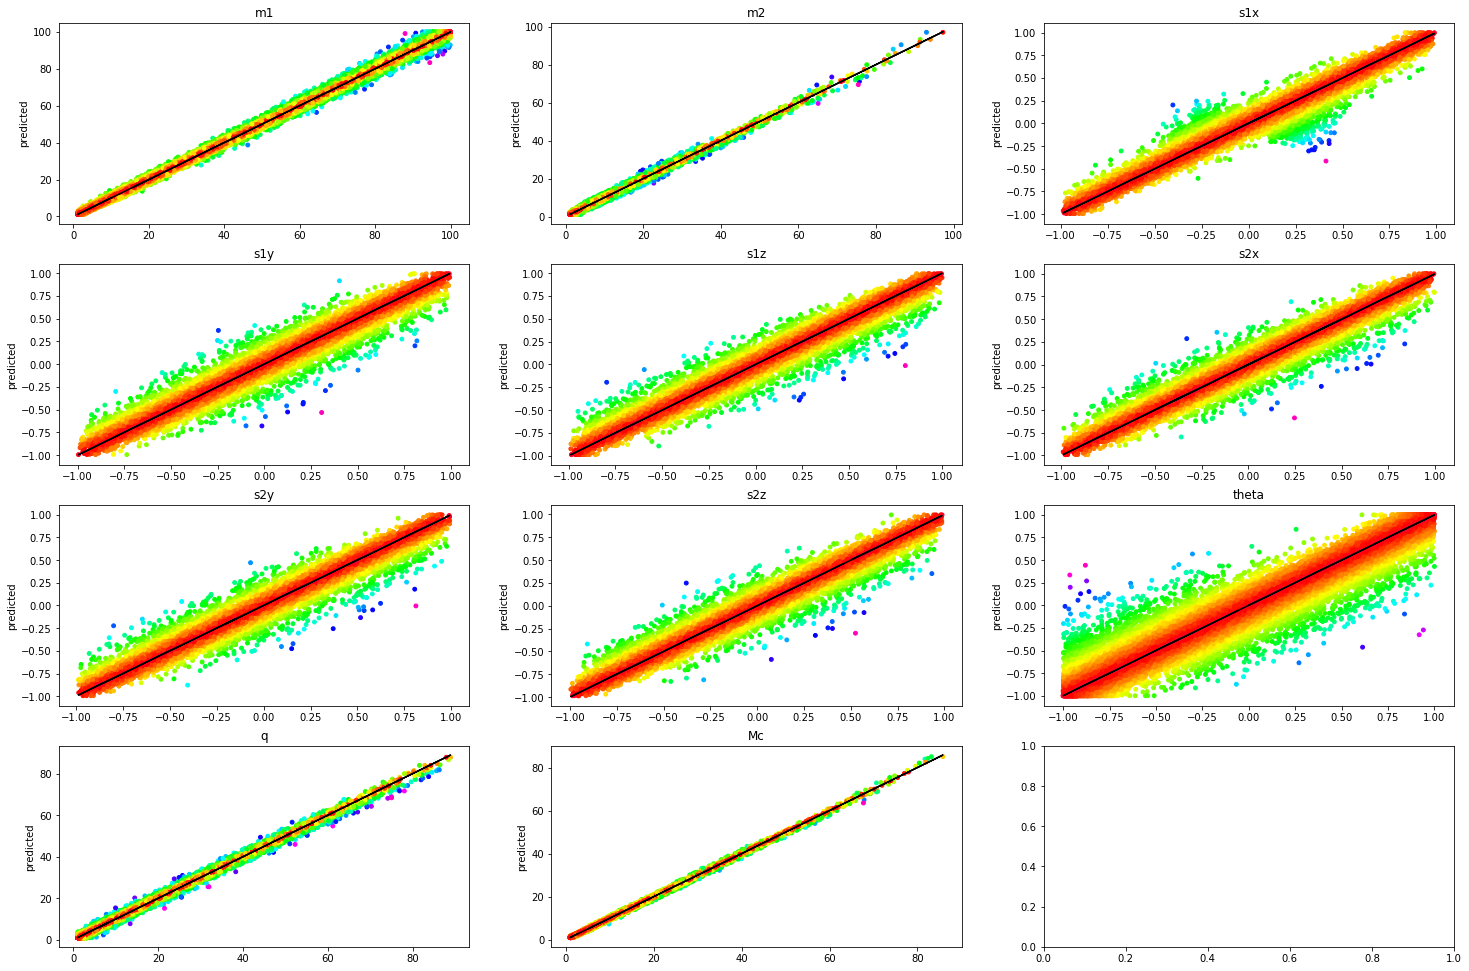

********************************************************************************
Key: v1c0
********************************************************************************
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (64, 100)                 1200      
                                                                 
 dense_4 (Dense)             (64, 100)                 10100     
                                                                 
 dense_5 (Dense)             (64, 11)                  1111      
                                                                 
Total params: 12,411
Trainable params: 12,411
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
282/282 [==============================] - 1s 3ms/step - loss: 0.2836 - mean_squared_error: 0.2833 - accuracy: 0.2434 - val_loss: 

282/282 [==============================] - 0s 2ms/step - loss: 0.0792 - mean_squared_error: 0.0792 - accuracy: 0.4996 - val_loss: 0.0775 - val_mean_squared_error: 0.0774 - val_accuracy: 0.5160
Epoch 37/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0789 - mean_squared_error: 0.0789 - accuracy: 0.5001 - val_loss: 0.0777 - val_mean_squared_error: 0.0777 - val_accuracy: 0.5145
Epoch 38/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0785 - mean_squared_error: 0.0784 - accuracy: 0.5023 - val_loss: 0.0772 - val_mean_squared_error: 0.0771 - val_accuracy: 0.5180
Epoch 39/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0782 - mean_squared_error: 0.0782 - accuracy: 0.5034 - val_loss: 0.0775 - val_mean_squared_error: 0.0774 - val_accuracy: 0.5200
Epoch 40/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0778 - mean_squared_error: 0.0777 - accuracy: 0.5056 - val_loss: 0.0764 - val_mean_squared_error: 0.0763 - val_

Epoch 76/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0700 - mean_squared_error: 0.0700 - accuracy: 0.5364 - val_loss: 0.0703 - val_mean_squared_error: 0.0702 - val_accuracy: 0.5530
Epoch 77/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0699 - mean_squared_error: 0.0699 - accuracy: 0.5376 - val_loss: 0.0706 - val_mean_squared_error: 0.0705 - val_accuracy: 0.5550
Epoch 78/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0697 - mean_squared_error: 0.0698 - accuracy: 0.5369 - val_loss: 0.0704 - val_mean_squared_error: 0.0703 - val_accuracy: 0.5540
Epoch 79/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0696 - mean_squared_error: 0.0696 - accuracy: 0.5371 - val_loss: 0.0703 - val_mean_squared_error: 0.0703 - val_accuracy: 0.5555
Epoch 80/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0694 - mean_squared_error: 0.0694 - accuracy: 0.5394 - val_loss: 0.0688 - val_mean_squared_error: 

Epoch 116/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0652 - mean_squared_error: 0.0653 - accuracy: 0.5549 - val_loss: 0.0657 - val_mean_squared_error: 0.0655 - val_accuracy: 0.5705
Epoch 117/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0652 - mean_squared_error: 0.0651 - accuracy: 0.5553 - val_loss: 0.0656 - val_mean_squared_error: 0.0654 - val_accuracy: 0.5740
Epoch 118/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0651 - mean_squared_error: 0.0651 - accuracy: 0.5550 - val_loss: 0.0655 - val_mean_squared_error: 0.0654 - val_accuracy: 0.5720
Epoch 119/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0649 - mean_squared_error: 0.0650 - accuracy: 0.5573 - val_loss: 0.0656 - val_mean_squared_error: 0.0654 - val_accuracy: 0.5715
Epoch 120/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0649 - mean_squared_error: 0.0648 - accuracy: 0.5564 - val_loss: 0.0652 - val_mean_squared_er

282/282 [==============================] - 1s 2ms/step - loss: 0.0618 - mean_squared_error: 0.0619 - accuracy: 0.5689 - val_loss: 0.0626 - val_mean_squared_error: 0.0624 - val_accuracy: 0.5800
Epoch 156/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0617 - mean_squared_error: 0.0618 - accuracy: 0.5721 - val_loss: 0.0624 - val_mean_squared_error: 0.0622 - val_accuracy: 0.5785
Epoch 157/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0617 - mean_squared_error: 0.0617 - accuracy: 0.5709 - val_loss: 0.0630 - val_mean_squared_error: 0.0629 - val_accuracy: 0.5780
Epoch 158/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0616 - mean_squared_error: 0.0616 - accuracy: 0.5724 - val_loss: 0.0623 - val_mean_squared_error: 0.0621 - val_accuracy: 0.5805
Epoch 159/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0615 - mean_squared_error: 0.0615 - accuracy: 0.5722 - val_loss: 0.0624 - val_mean_squared_error: 0.0622 - 

Epoch 195/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0589 - mean_squared_error: 0.0590 - accuracy: 0.5851 - val_loss: 0.0599 - val_mean_squared_error: 0.0597 - val_accuracy: 0.5870
Epoch 196/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0589 - mean_squared_error: 0.0589 - accuracy: 0.5842 - val_loss: 0.0606 - val_mean_squared_error: 0.0604 - val_accuracy: 0.5860
Epoch 197/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0588 - mean_squared_error: 0.0588 - accuracy: 0.5845 - val_loss: 0.0602 - val_mean_squared_error: 0.0600 - val_accuracy: 0.5910
Epoch 198/200
282/282 [==============================] - 0s 2ms/step - loss: 0.0588 - mean_squared_error: 0.0588 - accuracy: 0.5855 - val_loss: 0.0602 - val_mean_squared_error: 0.0600 - val_accuracy: 0.5845
Epoch 199/200
282/282 [==============================] - 1s 2ms/step - loss: 0.0587 - mean_squared_error: 0.0587 - accuracy: 0.5858 - val_loss: 0.0599 - val_mean_squared_er

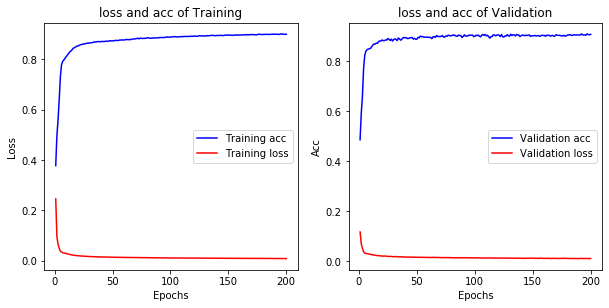

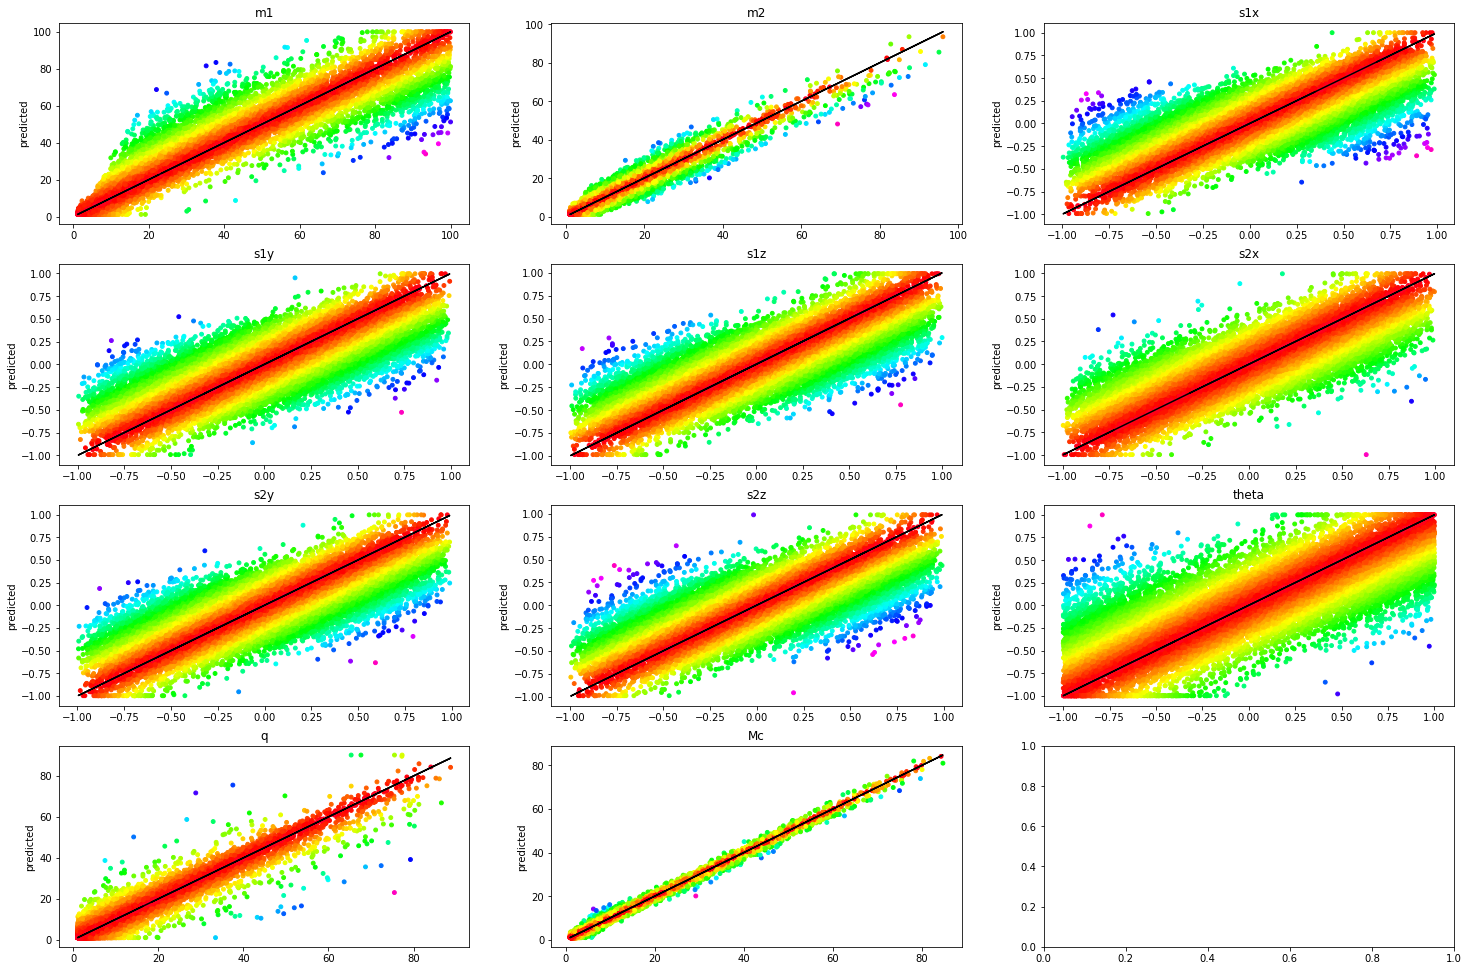

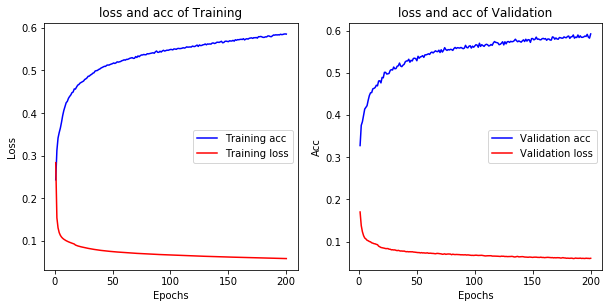

In [6]:
dashes = '*'*80

for key in keys:
    print(dashes, '\nKey: ', key, '\n', dashes, sep='')
    
    data_paths = {}
    data_paths['xtrain'] = regr_data_dir+key+'train_x.csv'
    data_paths['ytrain'] = regr_data_dir+key+'train_y.csv'
    data_paths['xtest']  = regr_data_dir+key+'test_x.csv'
    data_paths['ytest']  = regr_data_dir+key+'test_y.csv'

    rdl_out = ut.regressionDatasetLoader(data_paths, features_names,
                           scaler_type=scaler_type,
                           remove_some_mass=remove_some_mass)
    
    xtrain   = rdl_out['xtrain']
    ytrain   = rdl_out['ytrain']
    xtest    = rdl_out['xtest']
    ytest    = rdl_out['ytest']
    scaler_x = rdl_out['scaler_x']
    scaler_y = rdl_out['scaler_y']
    labels   = rdl_out['labels']
    
    Nfeatures = len(xtrain[0,:])
    
    # build, compile and train the model
    model = buildModelUsingSequential(hlayers_sizes, batch_size, Nfeatures)
    model.compile(
        loss=mse, 
        optimizer=Adam(learning_rate=learning_rate), 
        metrics=[mse, 'accuracy']
    )
    model.summary()
    t0 = time.perf_counter()
    history = model.fit(xtrain, ytrain, 
        epochs           = epochs, 
        batch_size       = batch_size,
        validation_split = validation_split,
        verbose          = verbose_training
    )
    train_time = time.perf_counter()-t0
    
    # predict
    ypredicted = model.predict(xtest)
    
    # print some information
    metrics_dict = ut.evalutationMetricsDict(xtest,ytest,model)
    ut.printMetrics(metrics_dict)

    # update dictionary adding data (both normalized and not), model and score
    datasets[key].train_time = train_time
    datasets[key].model      = model
    datasets[key].history    = history
    datasets[key].predicted  = scaler_y.inverse_transform(ypredicted)
    datasets[key].metrics    = metrics_dict
    datasets[key].Ntrain     = len(xtrain[:,0])
    
    # plot
    ut.predictionPlots(ytest, ypredicted, labels, scaler=scaler_y)
    
    del model
    
    ut.plotHistory(history)

## Produce CSV files

In [7]:
if write_output:
    for key in keys:
        # save csv
        filename = out_data_dir+'NN_tf_'+key+'.csv'
        ut.writeResult(filename, datasets[key].predicted, verbose=True)
        
        # save model
        #dict_name = out_data_dir+'NN_tf_'+key+'.dict'
        #pickle.dump(datasets[key].model, open(dict_name, 'wb'))
        #print(dict_name, 'saved') 
        
        # example for loading models
        #dict_name    = out_data_dir+'NN_tf_'+key+'.dict'
        #print('Loading', dict_name, '...')
        #loaded_model = pickle.load(open(dict_name, 'rb'))